In [1]:
import pandas as pd
from numpy import mean,inf
from numpy import std,var
from pandas import read_csv
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import LinearSVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix,accuracy_score,classification_report
import seaborn as sns
from collections import Counter

In [2]:
pd.set_option('precision',3)

In [3]:
df = pd.read_csv('../../../data/dataset.csv')

In [4]:
df.columns

Index(['Shots', 'Saves', 'Crosses', 'Fouls', 'Offsides', 'Corners',
       'Yellow Card', 'Red Cards', 'Passes', 'Interceptions', 'Blocks',
       'Catches', 'Tackles', 'liverpool_result_ft', 'Rest_Days', 'Elo_Diff',
       'home_0_away_1'],
      dtype='object')

In [5]:
def get_new_target(col):
    return 1 if col == 'V' else 0

In [6]:
df['new_target'] = df['liverpool_result_ft'].apply(get_new_target)

In [7]:
target = df['liverpool_result_ft']

In [8]:
df.describe()

,Shots,Saves,Crosses,Fouls,Offsides,Corners,Yellow Card,Red Cards,Passes,Interceptions,Blocks,Catches,Tackles,Rest_Days,Elo_Diff,home_0_away_1,new_target
count,346.000,346.000,346.000,346.000,346.000,346.000,346.00,346.000,346.000,346.000,346.000,346.000,346.000,346.000,346.000,346.000,346.000
mean,16.286,2.324,22.584,10.130,2.113,6.350,1.37,0.043,464.855,27.014,12.162,2.335,13.049,5.977,148.674,0.503,0.587
std,5.980,1.758,10.916,3.674,1.642,3.142,1.19,0.204,133.491,34.157,7.430,2.335,9.016,6.114,145.234,0.501,0.493
min,4.000,0.000,0.000,3.000,0.000,0.000,0.00,0.000,144.000,0.000,0.000,0.000,0.000,2.000,-246.692,0.000,0.000
25%,12.000,1.000,15.000,7.000,1.000,4.000,0.00,0.000,369.250,4.000,5.250,0.000,7.000,3.000,46.928,0.000,0.000
50%,16.000,2.000,21.000,10.000,2.000,6.000,1.00,0.000,456.500,8.000,12.000,2.000,11.500,5.000,163.281,1.000,1.000
75%,20.000,3.000,29.000,13.000,3.000,8.000,2.00,0.000,550.000,39.000,18.000,4.000,16.000,7.000,250.997,1.000,1.000
max,37.000,10.000,72.000,22.000,10.000,17.000,6.00,1.000,929.000,154.000,34.000,11.000,62.000,102.000,507.908,1.000,1.000


In [8]:
x = df.drop(columns=['liverpool_result_ft','new_target'])

In [9]:
counter = Counter(target)
for k,v in counter.items():
	per = v / len(target) * 100
	print('Class=%s, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=V, Count=203, Percentage=58.671%
Class=D, Count=64, Percentage=18.497%
Class=N, Count=79, Percentage=22.832%


NameError: name 'plt' is not defined

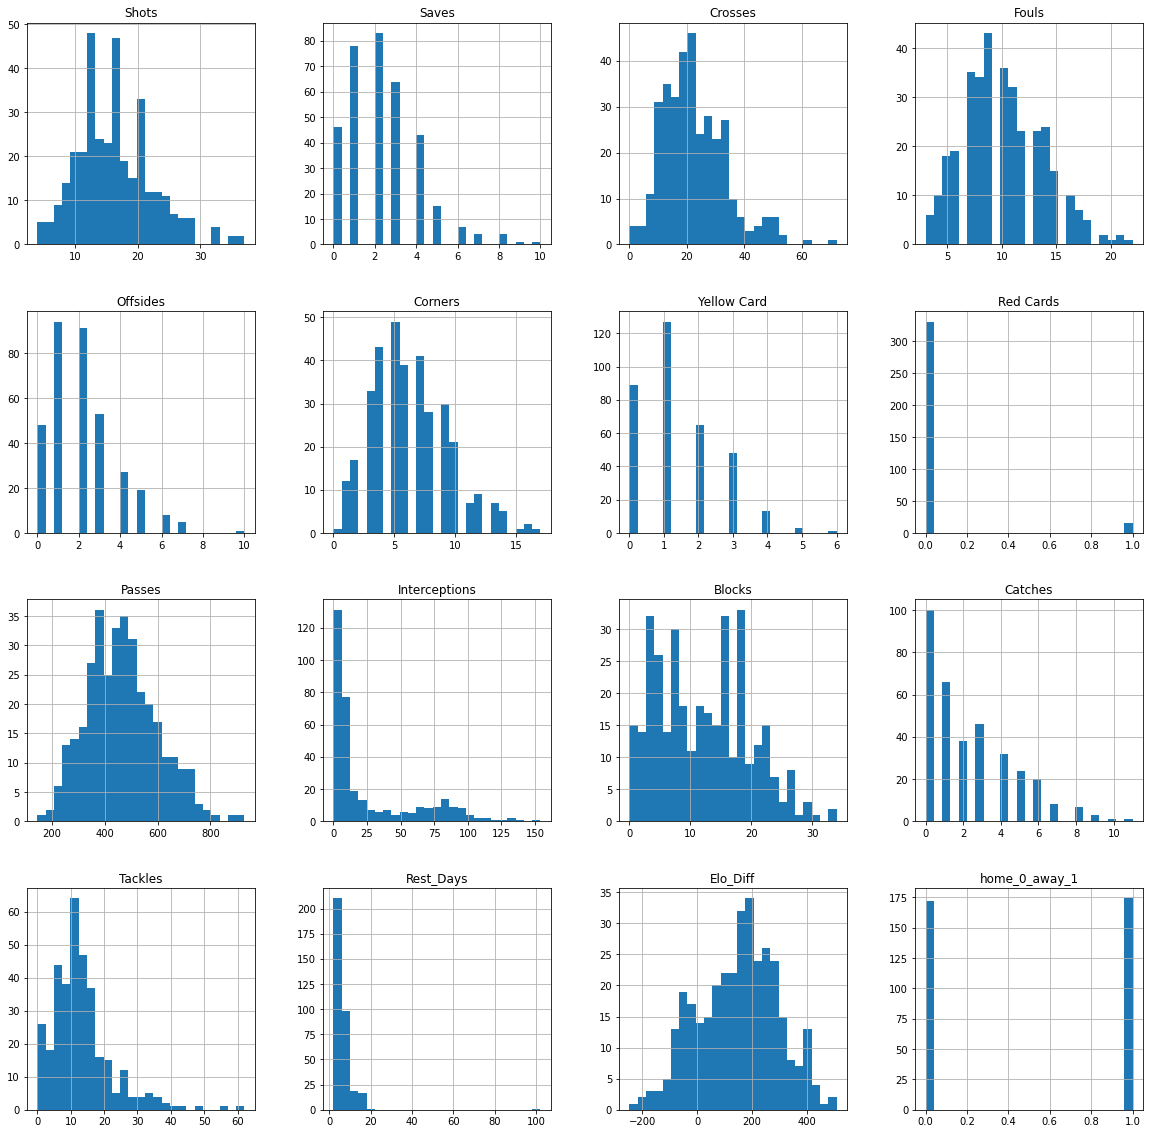

In [11]:
x.hist(bins=25,figsize=(20,20))
plt.show()

In [10]:
x_scaled = pd.DataFrame(StandardScaler().fit_transform(x),columns=x.columns)

NameError: name 'plt' is not defined

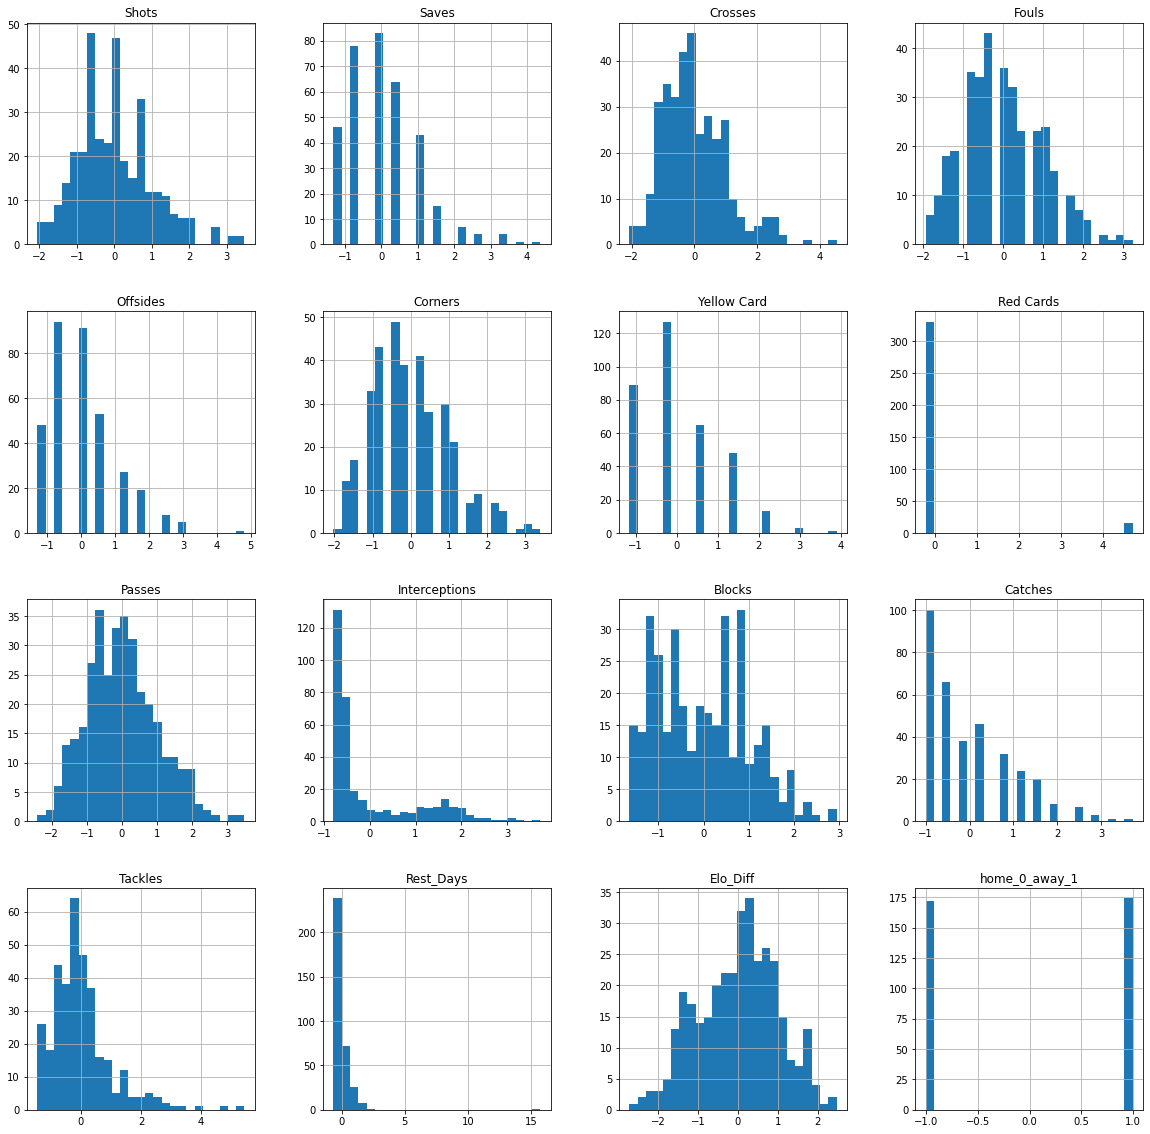

In [13]:
x_scaled.hist(bins=25,figsize=(20,20))
plt.show()

In [11]:
y = LabelEncoder().fit_transform(target)

In [12]:
y_new = df['new_target']

In [13]:
def evaluate_model(X, y, model):
	# define evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
	# evaluate model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# Multi Class Prediction

In [24]:
# define models to test
def get_models():
    models, names = list(), list()
    #LR
    models.append(LogisticRegression(solver='lbfgs', multi_class='multinomial'))
    names.append('LR')
    # LDA
    models.append(LinearDiscriminantAnalysis())
    names.append('LDA')
    # Bagging LDA
#     models.append(BaggingClassifier(base_estimator=LinearDiscriminantAnalysis(), n_estimators=1000))
#     names.append('BAG-LDA')
    # SVM
    models.append(LinearSVC())
    names.append('SVM')  
    # RF
    models.append(RandomForestClassifier(n_estimators=1000))
    names.append('RF')
    # ET
    models.append(ExtraTreesClassifier(n_estimators=1000))
    names.append('ET')
    #NB
    models.append(GaussianNB())
    names.append('NB')
    
    return models, names
 

# define models
models, names = get_models()
results = list()
# evaluate each model
for i in range(len(models)):
	# evaluate the model and store results
	scores = evaluate_model(x, y, models[i])
	results.append(scores)
	# summarize performance
	print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))
# plot the results
# f, axs = pyplot.subplots(1,1,figsize=(15,15))
# pyplot.boxplot(results, labels=names, showmeans=True)
# pyplot.ylabel('Accuracy')

# pyplot.show()
# pyplot.savefig('comparaison_non_scaled.jpg')

>LR 0.590 (0.039)
>LDA 0.606 (0.046)
>SVM 0.464 (0.166)
>RF 0.601 (0.032)
>ET 0.614 (0.036)
>NB 0.570 (0.030)


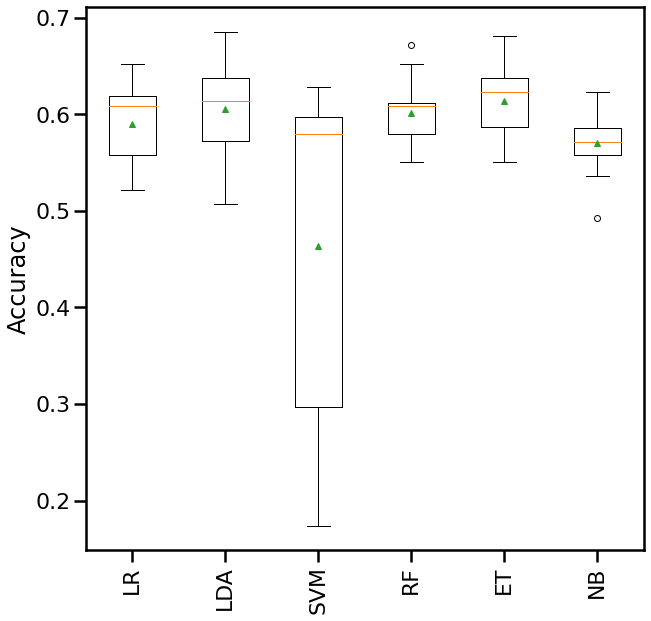

In [25]:
sns.set_context("poster")
f, axs = pyplot.subplots(1,1,figsize=(10,10))
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.ylabel('Accuracy')
pyplot.xticks(rotation=90)
pyplot.savefig('comparaison_non_scaled.jpg')
pyplot.show()

In [29]:
# define models to test
# define models to test
def get_models():
    models, names = list(), list()
    #LR
    models.append(LogisticRegression(solver='lbfgs', multi_class='multinomial'))
    names.append('LR')
    # LDA
    models.append(LinearDiscriminantAnalysis())
    names.append('LDA')
    # Bagging LDA
#     models.append(BaggingClassifier(base_estimator=LinearDiscriminantAnalysis(), n_estimators=1000))
#     names.append('BAG-LDA')
    # SVM
    models.append(LinearSVC())
    names.append('SVM')  
    # RF
    models.append(RandomForestClassifier(n_estimators=1000))
    names.append('RF')
    # ET
    models.append(ExtraTreesClassifier(n_estimators=1000))
    names.append('ET')
    #NB
    models.append(GaussianNB())
    names.append('NB')
    
    return models, names
 
 

# define models
models_non_scaled, names_non_scaled = get_models()
results_non_scaled = list()
# evaluate each model
for i in range(len(models)):
	# evaluate the model and store results
	scores_non_scaled = evaluate_model(x_scaled, y, models[i])
	results_non_scaled.append(scores_non_scaled)
	# summarize performance
	print('>%s %.3f (%.3f)' % (names_non_scaled[i], mean(scores_non_scaled), std(scores_non_scaled)))
# plot the results

# f, axs = pyplot.subplots(1,1,figsize=(15,15))
# pyplot.boxplot(results, labels=names, showmeans=True)
# pyplot.ylabel('Accuracy')
#pyplot.savefig('comparaison_scaled.jpg')
#pyplot.show()

>LR 0.612 (0.043)
>LDA 0.606 (0.046)
>SVM 0.615 (0.035)
>RF 0.600 (0.033)
>ET 0.612 (0.026)
>NB 0.570 (0.030)


TypeError: set() takes 1 positional argument but 2 were given

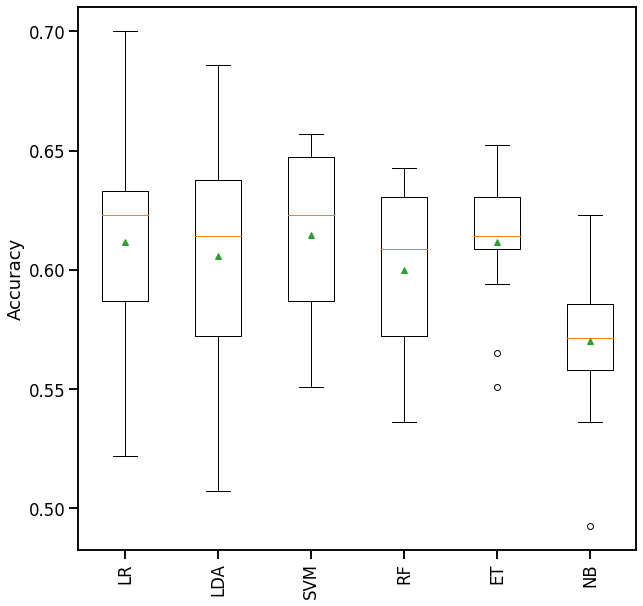

In [41]:
sns.set_context("talk", rc={"lines.linewidth": 2})
f, axs = pyplot.subplots(1,1,figsize=(10,10))
pyplot.boxplot(results_non_scaled, labels=names_non_scaled, showmeans=True)
pyplot.ylabel('Accuracy')
pyplot.xticks(rotation=90)
pyplot.savefig('comparaison_scaled.jpg')
ttl = axs.title
ttl.set_position([.5, 1.05])
#pyplot.title('Accuracy des modèles avec les données normalisées')
ttl.set('Accuracy des modèles avec les données normalisées')
pyplot.show()

In [16]:
[max(x) for x in results]

[0.7,
 0.6857142857142857,
 0.6571428571428571,
 0.6714285714285714,
 0.6428571428571429,
 0.6811594202898551,
 0.6231884057971014]

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,test_size = 0.25)

In [17]:
model = LogisticRegression()

In [18]:
model.fit(x_train,y_train)

LogisticRegression()

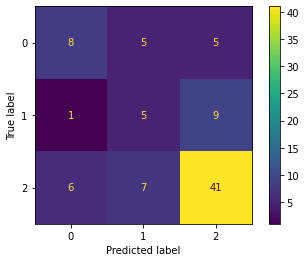

In [20]:
plot_confusion_matrix(model,x_test,y_test)

In [142]:
accuracy_score(y_test,model.predict(x_test))

0.632183908045977

In [147]:
print(classification_report(y_test,model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.56      0.60      0.58        15
           1       0.20      0.05      0.08        19
           2       0.68      0.85      0.76        53

    accuracy                           0.63        87
   macro avg       0.48      0.50      0.47        87
weighted avg       0.56      0.63      0.58        87



In [22]:
print(classification_report(y_test,model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.53      0.44      0.48        18
           1       0.29      0.33      0.31        15
           2       0.75      0.76      0.75        54

    accuracy                           0.62        87
   macro avg       0.52      0.51      0.52        87
weighted avg       0.62      0.62      0.62        87



# Binary Classification

In [80]:
print(x.shape, y.shape, Counter(y_new))
model = DummyClassifier(strategy='most_frequent')
# evaluate the model
scores = evaluate_model(x, y_new, model)
# summarize performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

(346, 16) (346,) Counter({1: 203, 0: 143})
Mean Accuracy: 0.587 (0.007)


>LR 0.677 (0.039)
>LDA 0.692 (0.048)
>SVM 0.584 (0.092)
>BAG 0.655 (0.055)
>RF 0.652 (0.061)
>ET 0.663 (0.054)
>NB 0.630 (0.036)
>KNN 0.602 (0.065)


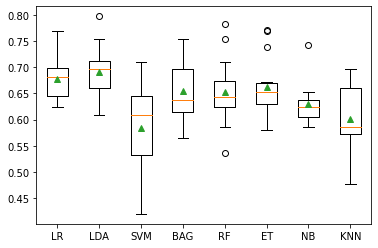

In [83]:
# define models to test
def get_models():
    models, names = list(), list()
    #LR
    models.append(LogisticRegression(solver='lbfgs', multi_class='ovr'))
    names.append('LR')
    # LDA
    models.append(LinearDiscriminantAnalysis())
    names.append('LDA')
    # SVM
    models.append(LinearSVC())
    names.append('SVM')
    # Bagging
    models.append(BaggingClassifier(n_estimators=1000))
    names.append('BAG')
    # RF
    models.append(RandomForestClassifier(n_estimators=1000))
    names.append('RF')
    # ET
    models.append(ExtraTreesClassifier(n_estimators=1000))
    names.append('ET')
    #NB
    models.append(GaussianNB())
    names.append('NB')
    # KNN
    models.append(KNeighborsClassifier(n_neighbors=3))
    names.append('KNN')
    return models, names
 

# define models
models, names = get_models()
results = list()
# evaluate each model
for i in range(len(models)):
	# evaluate the model and store results
	scores = evaluate_model(x, y_new, models[i])
	results.append(scores)
	# summarize performance
	print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))
# plot the results
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>LR 0.669 (0.050)
>LDA 0.692 (0.048)
>SVM 0.686 (0.048)
>BAG 0.653 (0.052)
>RF 0.648 (0.064)
>ET 0.654 (0.062)
>NB 0.630 (0.036)
>KNN 0.632 (0.043)


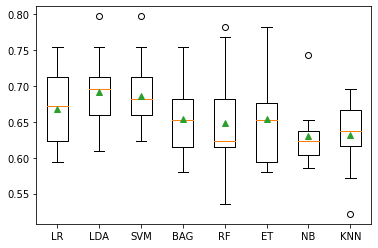

In [85]:
# define models to test
def get_models():
    models, names = list(), list()
    #LR
    models.append(LogisticRegression(solver='lbfgs', multi_class='ovr'))
    names.append('LR')
    # LDA
    models.append(LinearDiscriminantAnalysis())
    names.append('LDA')
    # SVM
    models.append(LinearSVC())
    names.append('SVM')
    # Bagging
    models.append(BaggingClassifier(n_estimators=1000))
    names.append('BAG')
    # RF
    models.append(RandomForestClassifier(n_estimators=1000))
    names.append('RF')
    # ET
    models.append(ExtraTreesClassifier(n_estimators=2000))
    names.append('ET')
    #NB
    models.append(GaussianNB())
    names.append('NB')
    # KNN
    models.append(KNeighborsClassifier(n_neighbors=3))
    names.append('KNN')
    return models, names
 

# define models
models, names = get_models()
results = list()
# evaluate each model
for i in range(len(models)):
	# evaluate the model and store results
	scores = evaluate_model(x_scaled, y_new, models[i])
	results.append(scores)
	# summarize performance
	print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))
# plot the results
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y_new,test_size = 0.25)

In [24]:
model = LogisticRegression()

In [25]:
model.fit(x_train,y_train)

LogisticRegression()

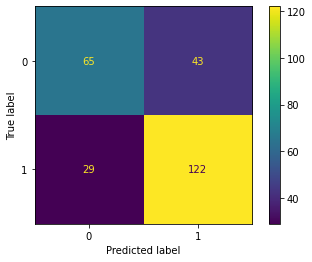

In [27]:
plot_confusion_matrix(model,x_train,y_train)

In [28]:
print(classification_report(y_test,model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.61      0.57      0.59        35
           1       0.72      0.75      0.74        52

    accuracy                           0.68        87
   macro avg       0.66      0.66      0.66        87
weighted avg       0.68      0.68      0.68        87



In [156]:
accuracy_score(y_train,model.predict(x_train))

0.7335907335907336

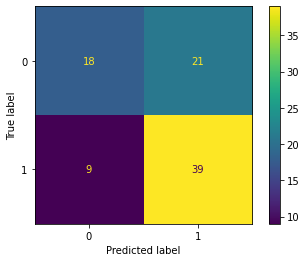

In [152]:
plot_confusion_matrix(model,x_test,y_test)
plt.show()

In [153]:
accuracy_score(y_test,model.predict(x_test))

0.6551724137931034

In [154]:
print(classification_report(y_test,model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.67      0.46      0.55        39
           1       0.65      0.81      0.72        48

    accuracy                           0.66        87
   macro avg       0.66      0.64      0.63        87
weighted avg       0.66      0.66      0.64        87

